In [5]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common and parent modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Get the data you want
from common import get_baseline_data
nba = get_baseline_data('../data/cleaned_data/base_cleaned.csv')
X = nba[['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']].values
y = nba[['inflationAdjSalary_log']].values
y = y/y.max()

c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
# Train the PCA
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

<Axes: xlabel='pca-one', ylabel='pca-two'>

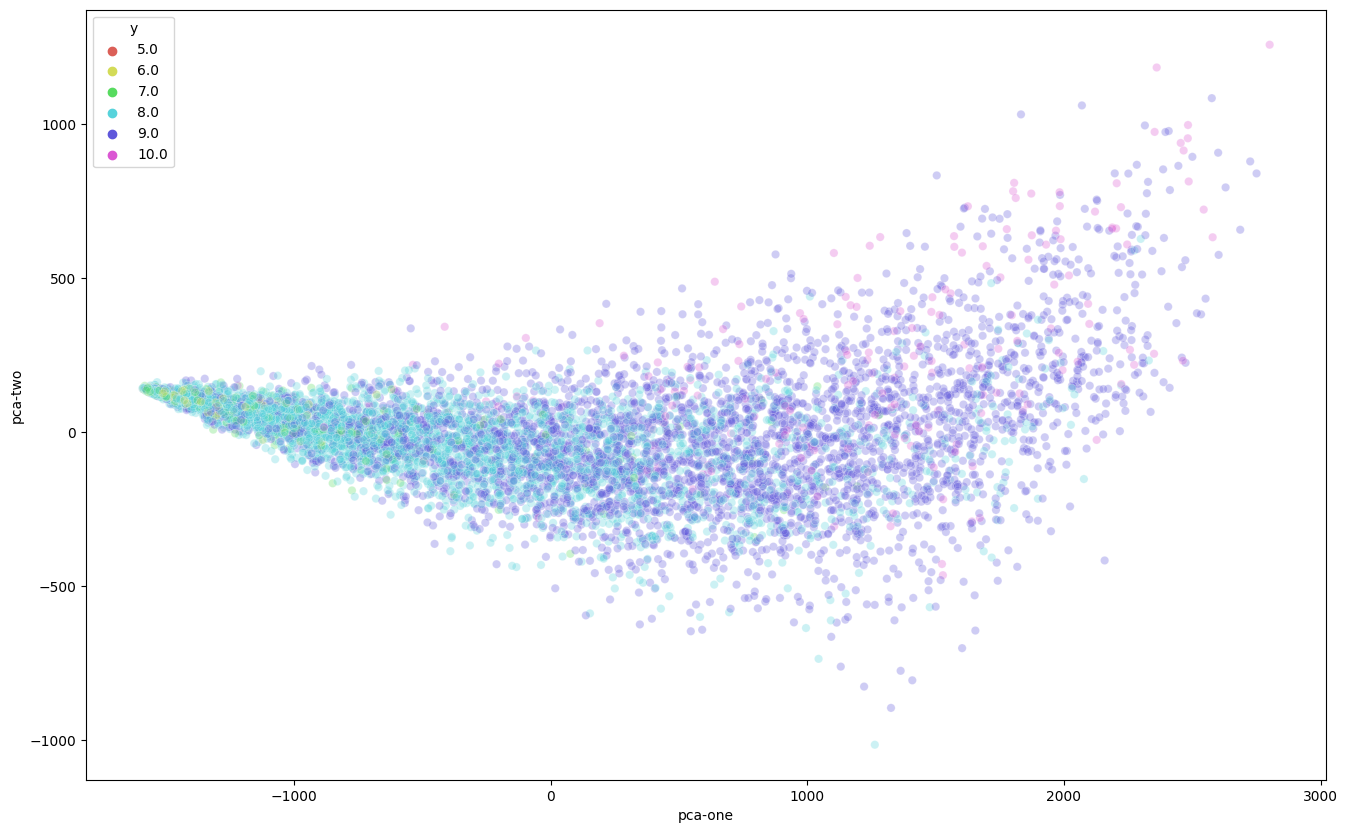

In [8]:
# Classify the data based on the PCA computed
import matplotlib.pyplot as plt
import seaborn as sns
df_subset = {}
df_subset['pca-one'] = pca_result[:,0]
print(df_subset['pca-one'])
df_subset['pca-two'] = pca_result[:,1]
df_subset['y'] = np.rint(y[:,0] * 10)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

The way that I would interpret these two plots is that it seems that our data has one primary principle component along which values between 0.8 and 0.9 are clearly separable, but this is not necessarily the case along other components